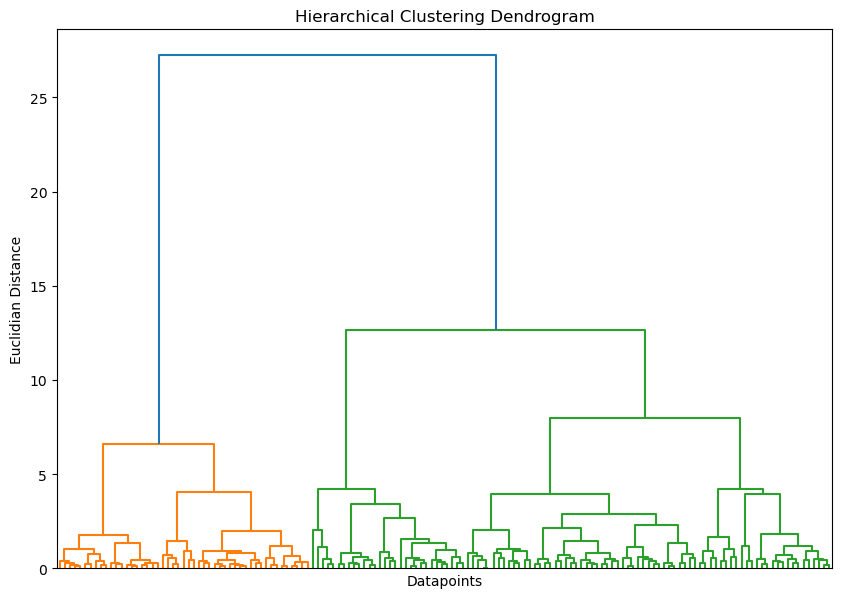

No of Cluster from the Dendogram = 2


In [1]:
# Important Libraries

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris=load_iris()

#Convert it to a dataframe
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Scaling the features using Standrad Scaler with mean =0 and variance 1
scaled_data=StandardScaler().fit_transform(df)


#Hierarchical Clustering and Plot Dendrogram
Linkage=linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Linkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xticks([]) # Turn off x-ticks
plt.xlabel('Datapoints')
plt.ylabel('Euclidian Distance')
plt.show()


print('No of Cluster from the Dendogram = 2')

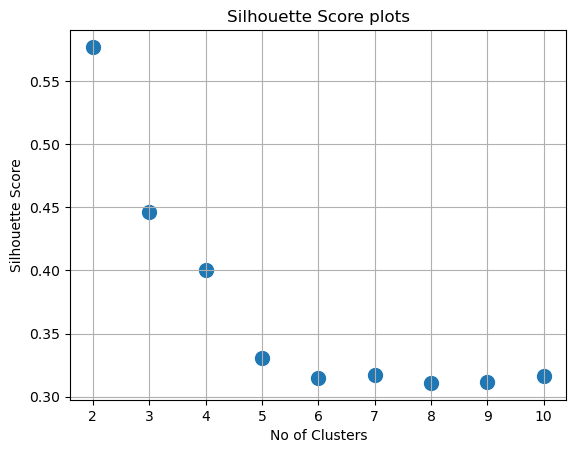

Optimal value of k and Silhouette Score 2 , 0.5770346019475988


In [2]:
#Using Silhouette Score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

s_score=[]

k_values=np.arange(2,11)
Linkage=linkage(scaled_data, method='ward')

for k in k_values:
    cluster_label=fcluster(Linkage, k, criterion='maxclust')
    shilhoutte_avg=silhouette_score(scaled_data, cluster_label)
    s_score.append(shilhoutte_avg)
    
#Plot the Silhouette Score
plt.scatter(k_values,s_score, s=100)
plt.grid(True)
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score plots')
plt.show()

#Determine the optimal value of k
optimal_k=k_values[np.argmax(s_score)]

print('Optimal value of k and Silhouette Score', optimal_k, ',', s_score[np.argmax(s_score)])

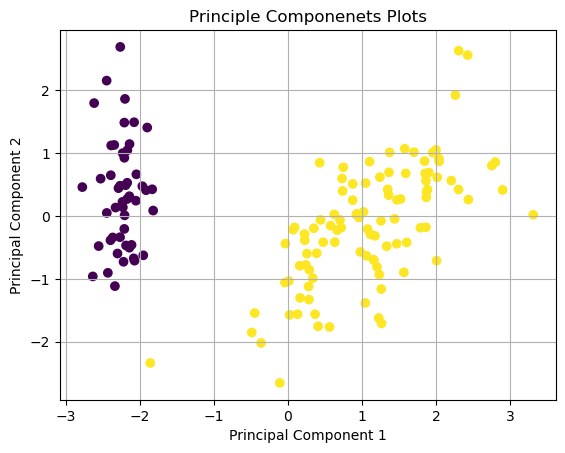

In [4]:
#Evaluation and Visualization

#We will reduce it to 2 components (PCA) for better visulas 
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)
df_=pd.DataFrame(data_pca)

#Using optimal cluster
Linkage=linkage(scaled_data, method='ward')
cluster_label=fcluster(Linkage, optimal_k, criterion='maxclust')
df_['label']=cluster_label

#plot PC1 and PC2
plt.scatter(df_[0],df_[1], c=df_['label'])
plt.grid(True)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principle Componenets Plots')
plt.show()


